In [1]:
import numpy
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv2
from sklearn.datasets import load_files

In [2]:
from glob import glob
train_data = glob('C:/Users/Lenovo/Downloads/42892_76085_bundle_archive/walk_or_run_train/train/*/*.png')
test_data = glob('C:/Users/Lenovo/Downloads/42892_76085_bundle_archive/walk_or_run_train/test/*/*.png')

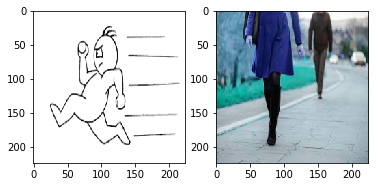

In [3]:
plt.subplot(121)
plt.imshow(cv2.imread(train_data[0]))
plt.subplot(122)
plt.imshow(cv2.imread(train_data[302]))
plt.show()

In [4]:
train_data_shape = cv2.imread(train_data[0]).shape
print('Train Data Shape: {}'.format(train_data_shape))

Train Data Shape: (224, 224, 3)


In [5]:
print(keras.__version__)

2.3.0-tf


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [7]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_data_gen.flow_from_directory('C:/Users/Lenovo/Downloads/42892_76085_bundle_archive/walk_or_run_train/train',
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     class_mode='binary')

Found 600 images belonging to 2 classes.


In [9]:
test_generator = test_data_gen.flow_from_directory('C:/Users/Lenovo/Downloads/42892_76085_bundle_archive/walk_or_run_test/test/',
                                                  target_size=(224, 224),
                                                     batch_size=32,
                                                     class_mode='binary')

Found 141 images belonging to 2 classes.


In [10]:
from tensorflow.keras import models, layers
import tensorboard
from tensorflow.keras.losses import BinaryCrossentropy

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [14]:
model.compile(optimizer='adam',
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
from datetime import datetime
log_dir = 'F:/tensorbord_logs/logs'+ datetime.now().strftime("%Y%m%d-%H%M%S")
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
modelcheckpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
Tensorboard_Callbacks = tensorflow.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [16]:
'''def image_dummary(epoch, logs):
    with file_writer.as_default():
    train_images = np.reshape(train_data[0:25], (-1, 224, 224, 3))
    tensorflow.summary.image("25 training data examples", train_images, max_outputs=25, step=0)
    test_images = np.reshape(test_data[0:25], (-1, 224, 224, 3))
    tensorflow.summary.image("25 test data examples", test_images, max_outputs=25, step=0)'''

'def image_dummary(epoch, logs):\n    with file_writer.as_default():\n    train_images = np.reshape(train_data[0:25], (-1, 224, 224, 3))\n    tensorflow.summary.image("25 training data examples", train_images, max_outputs=25, step=0)\n    test_images = np.reshape(test_data[0:25], (-1, 224, 224, 3))\n    tensorflow.summary.image("25 test data examples", test_images, max_outputs=25, step=0)'

In [17]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=train_generator.samples/train_generator.batch_size, 
                  validation_data = test_generator, validation_steps=test_generator.samples/test_generator.batch_size,
                  callbacks=[Tensorboard_Callbacks, modelcheckpoint])

Epoch 1/25
19/18 [==============================] - ETA: 0s - loss: 1.1179 - accuracy: 0.4983
Epoch 00001: val_accuracy improved from -inf to 0.58156, saving model to weights-improvement-01-0.58.hdf5
19/18 [==============================] - 52s 3s/step - loss: 1.1179 - accuracy: 0.4983 - val_loss: 0.6919 - val_accuracy: 0.5816
Epoch 2/25
19/18 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.5483
Epoch 00002: val_accuracy improved from 0.58156 to 0.62411, saving model to weights-improvement-02-0.62.hdf5
19/18 [==============================] - 51s 3s/step - loss: 0.6750 - accuracy: 0.5483 - val_loss: 0.7438 - val_accuracy: 0.6241
Epoch 3/25
19/18 [==============================] - ETA: 0s - loss: 0.6645 - accuracy: 0.5433
Epoch 00003: val_accuracy improved from 0.62411 to 0.65957, saving model to weights-improvement-03-0.66.hdf5
19/18 [==============================] - 50s 3s/step - loss: 0.6645 - accuracy: 0.5433 - val_loss: 0.5810 - val_accuracy: 0.6596
Epoch 4

In [29]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("F:/My_Models/model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save("F:/My_Models/model_num.h5")


In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


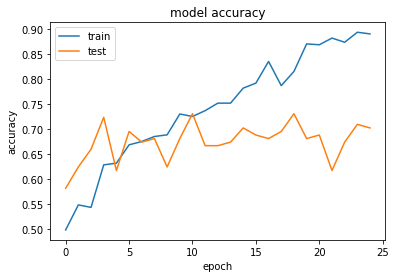

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

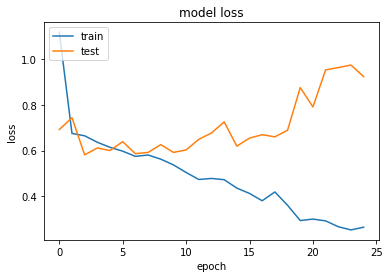

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()